# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input 

In [2]:
# Read data
train_data="/kaggle/input/alien-vs-predator-images/data/train/"
validation_data="/kaggle/input/alien-vs-predator-images/data/validation/"

In [3]:
import os
classes_train=os.listdir(train_data)
classes_test=os.listdir(validation_data)

In [4]:
print(classes_train)

['predator', 'alien']


In [5]:
print(classes_test)

['predator', 'alien']


# Data augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    shear_range=10,
    rescale=1.0/255.0,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data,
    batch_size=32,
    class_mode='binary',
    target_size=(224,224))


test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    validation_data,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(224,224)
)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Create the network

In [7]:
pre_model=ResNet50(include_top=False,
                   weights='imagenet'
                  )
for layer in pre_model.layers:
    layer.trainable = False

2022-10-23 19:21:57.402266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 19:21:57.510872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 19:21:57.511671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 19:21:57.513102: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step


In [8]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from keras import Model
y= pre_model.output
y= GlobalAveragePooling2D()(y)
y= Dense(256, activation='relu')(y) 
predictions = Dense(2, activation='softmax')(y)
model = Model(pre_model.input, predictions)

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Fit

In [11]:
model.fit_generator(
    train_generator, 
    epochs=15,
    validation_data=test_generator 
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-10-23 19:22:02.895990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-10-23 19:22:07.376796: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


22/22 [==============================] - 24s 673ms/step - loss: 0.7256 - accuracy: 0.5706 - val_loss: 0.6262 - val_accuracy: 0.6500
Epoch 2/15
22/22 [==============================] - 9s 387ms/step - loss: 0.7174 - accuracy: 0.5692 - val_loss: 0.8150 - val_accuracy: 0.6000
Epoch 3/15
22/22 [==============================] - 9s 397ms/step - loss: 0.7064 - accuracy: 0.5735 - val_loss: 0.6486 - val_accuracy: 0.6300
Epoch 4/15
22/22 [==============================] - 9s 397ms/step - loss: 0.6209 - accuracy: 0.6470 - val_loss: 0.6242 - val_accuracy: 0.6650
Epoch 5/15
22/22 [==============================] - 9s 431ms/step - loss: 0.6161 - accuracy: 0.6744 - val_loss: 0.8022 - val_accuracy: 0.5400
Epoch 6/15
22/22 [==============================] - 9s 403ms/step - loss: 0.6560 - accuracy: 0.6066 - val_loss: 0.6137 - val_accuracy: 0.6700
Epoch 7/15
22/22 [==============================] - 9s 385ms/step - loss: 0.5959 - accuracy: 0.6801 - val_loss: 0.6037 - val_accuracy: 0.6750
Epoch 8/15
22/22

In [12]:
losses = pd.DataFrame(model.history.history)

In [13]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.725579,0.570605,0.626197,0.650
1,0.717431,0.569164,0.815006,0.600
2,0.706399,0.573487,0.648641,0.630
3,0.620912,0.646974,0.624229,0.665
4,0.616092,0.674352,0.802154,0.540


<AxesSubplot:>

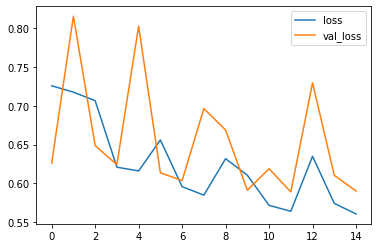

In [14]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

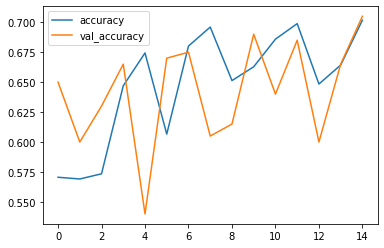

In [15]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

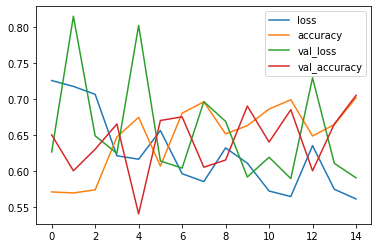

In [16]:
losses.plot()

In [17]:
model.evaluate(test_generator)

7/7 [==============================] - 1s 72ms/step - loss: 0.5902 - accuracy: 0.7050


[0.590221107006073, 0.7049999833106995]